In [153]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import randint as sp_randint
import numpy as np
import pandas as pd
from time import time
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%pylab inline
import seaborn as sns
figsize(12, 8)

Populating the interactive namespace from numpy and matplotlib


In [154]:
!ls

BankScoring.ipynb     BankScoring_v2.ipynb  laba04_train.csv
BankScoring_v1.ipynb  laba04_test.csv


In [155]:
train_df = pd.read_csv('laba04_train.csv')
test_df = pd.read_csv('laba04_test.csv')

In [156]:
y = train_df['TARGET']
train_df.drop(['TARGET'], axis=1, inplace=True)

In [157]:
#train_df = pd.concat([train_df, pd.get_dummies(train_df['PACK'], prefix="PACK")],axis=1)
#test_df = pd.concat([test_df, pd.get_dummies(train_df['PACK'], prefix="PACK")],axis=1)

train_df.drop(['Unnamed: 0', 'PACK'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0', 'PACK'], axis=1, inplace=True)

In [158]:
test_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,44399,NaN,NaN,NaN,369576,128215,146871,258492,369600,481638,590818
CR_PROD_CNT_IL,44399,NaN,NaN,NaN,0.102029,0.419946,0,0,0,0,10
AMOUNT_RUB_CLO_PRC,39605,NaN,NaN,NaN,0.0440032,0.109723,0,NaN,NaN,NaN,1
PRC_ACCEPTS_A_EMAIL_LINK,19378,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0
APP_REGISTR_RGN_CODE,7525,NaN,NaN,NaN,51.2587,21.6515,1,NaN,NaN,NaN,89
PRC_ACCEPTS_A_POS,19378,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0
PRC_ACCEPTS_A_TK,19378,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0
TURNOVER_DYNAMIC_IL_1M,44399,NaN,NaN,NaN,0.00125581,0.0292088,0,0,0,0,1
CNT_TRAN_AUT_TENDENCY1M,9667,NaN,NaN,NaN,0.412448,0.314596,0.0144928,NaN,NaN,NaN,1
SUM_TRAN_AUT_TENDENCY1M,9667,NaN,NaN,NaN,0.408287,0.335829,0.000527158,NaN,NaN,NaN,1


In [159]:
train_df.shape, test_df.shape

((399589, 114), (44399, 114))

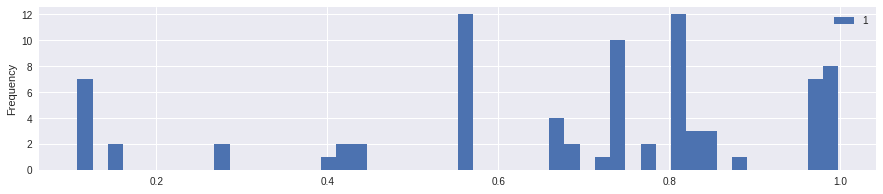

In [160]:
nan = []
for col in train_df.columns:
    if pd.isnull(train_df[col]).sum()/len(train_df[col]) > 0:
        nan.append([col, pd.isnull(train_df[col]).sum()/len(train_df[col])])
#print (pd.DataFrame(nan).to_string())
pd.DataFrame(nan).plot.hist(bins=50, figsize = [15,3])

                             0         1        2
0           AMOUNT_RUB_CLO_PRC  0.107933  float64
1     PRC_ACCEPTS_A_EMAIL_LINK  0.563789  float64
2            PRC_ACCEPTS_A_POS  0.563789  float64
3             PRC_ACCEPTS_A_TK  0.563789  float64
4      CNT_TRAN_AUT_TENDENCY1M  0.782959  float64
5      SUM_TRAN_AUT_TENDENCY1M  0.782959  float64
6           AMOUNT_RUB_SUP_PRC  0.107933  float64
7        PRC_ACCEPTS_A_AMOBILE  0.563789  float64
8      SUM_TRAN_AUT_TENDENCY3M  0.687516  float64
9               PRC_ACCEPTS_TK  0.563789  float64
10           PRC_ACCEPTS_A_MTP  0.563789  float64
11     CNT_TRAN_AUT_TENDENCY3M  0.687516  float64
12              CNT_ACCEPTS_TK  0.563789  float64
13          AMOUNT_RUB_NAS_PRC  0.107933  float64
14           CLNT_JOB_POSITION  0.406132   object
15         TRANS_COUNT_SUP_PRC  0.107933  float64
16           PRC_ACCEPTS_A_ATM  0.563789  float64
17             PRC_ACCEPTS_MTP  0.563789  float64
18         TRANS_COUNT_NAS_PRC  0.107933  float64


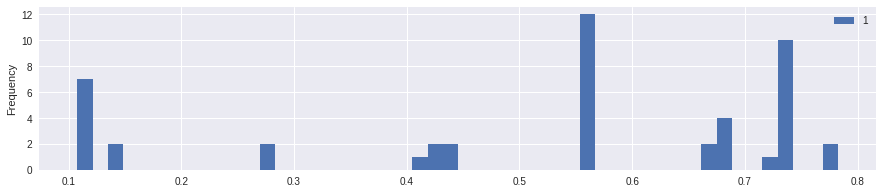

In [162]:
nan = []
for col in train_df.columns:
    if (pd.isnull(train_df[col]).sum()/len(train_df[col]) <= 0.80 \
        and pd.isnull(train_df[col]).sum()/len(train_df[col]) > 0) \
        or (pd.isnull(test_df[col]).sum()/len(test_df[col]) <= 0.80 \
        and pd.isnull(test_df[col]).sum()/len(test_df[col]) >0):
            
        nan.append([col, pd.isnull(train_df[col]).sum()/len(train_df[col]), train_df[col].dtype])
print (pd.DataFrame(nan).to_string())
pd.DataFrame(nan).plot.hist(bins=50, figsize = [15,3])

In [163]:
for n in pd.DataFrame(nan).iloc[:,0]:
    if(train_df[n].dtype == np.float64 or train_df[n].dtype == np.int64):
        train_df[n] = train_df[n].fillna(train_df[n].median())
        test_df[n] = test_df[n].fillna(test_df[n].median())

                              0         1        2
0          APP_REGISTR_RGN_CODE  0.828932  float64
1           CLNT_TRUST_RELATION  0.803858   object
2            APP_MARITAL_STATUS  0.807370   object
3       CNT_TRAN_MED_TENDENCY1M  0.805580  float64
4   APP_KIND_OF_PROP_HABITATION  0.832415   object
5        CLNT_JOB_POSITION_TYPE  0.873533   object
6             CLNT_JOB_POSITION  0.406132   object
7           APP_DRIVING_LICENSE  0.838211   object
8                 APP_EDUCATION  0.807705   object
9       CNT_TRAN_CLO_TENDENCY1M  0.813321  float64
10      SUM_TRAN_MED_TENDENCY1M  0.805580  float64
11              APP_TRAVEL_PASS  0.838211   object
12                      APP_CAR  0.838214   object
13      SUM_TRAN_CLO_TENDENCY1M  0.813321  float64
14            APP_POSITION_TYPE  0.829144   object
15                 APP_EMP_TYPE  0.809810   object
16              LDEAL_TENOR_MAX  0.977154  float64
17               LDEAL_YQZ_CHRG  0.996464  float64
18              DEAL_YQZ_IR_MAX

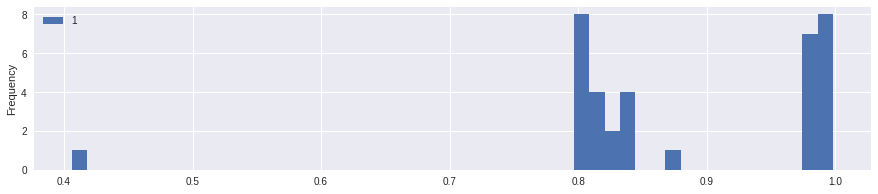

In [164]:
nan = []
for col in train_df.columns:
    if pd.isnull(train_df[col]).sum() > 0 or pd.isnull(test_df[col]).sum() > 0:
        nan.append([col, pd.isnull(train_df[col]).sum()/len(train_df[col]), train_df[col].dtype])
print (pd.DataFrame(nan).to_string())
pd.DataFrame(nan).plot.hist(bins=50, figsize = [15,3])

In [165]:
for n in pd.DataFrame(nan).iloc[:,0]:
    #if train_df[n].dtype == np.object:
        train_df.drop([n], axis=1, inplace=True)
        test_df.drop([n], axis=1, inplace=True)
    #else:   
     #   train_df[n] = train_df[n].fillna(train_df[n].median())
      #  test_df[n] = test_df[n].fillna(test_df[n].median())

In [166]:
for e in list(set(train_df.columns)-set(test_df.columns)):
    print (e)

In [167]:
train_df.drop(list(set(train_df.columns)-set(test_df.columns)), axis=1, inplace=True)

In [168]:
#tree_params = {'max_depth': [2, 3], 'min_samples_leaf': [2, 3]}
#cf = RandomizedSearchCV(,tree_params, n_jobs=-1,n_iter=10, scoring="f1",cv=5)
tree_params= {"max_depth": sp_randint(2, 10),
              "max_features": sp_randint(10, len(train_df.columns)),
              "min_samples_split": sp_randint(1, 10),
              "min_samples_leaf": sp_randint(1, 10),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

clf = RandomForestClassifier(n_estimators = 10,random_state=555, n_jobs=-1)

# run randomized search
n_iter_search = 40
random_search = RandomizedSearchCV(clf, param_distributions=tree_params, n_iter=n_iter_search, n_jobs=-1, cv=5)


random_search.fit(train_df,y)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=555,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c2f7b81d0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c2f27a950>, 'criterion': ['gini', 'entropy'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c2f27a510>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c2ebc18d0>},
          pre_dispatch='2*n_jobs', random

In [171]:
random_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 44,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [172]:
pred_prob = pd.DataFrame(zip(test_df.ID,random_search.predict_proba(test_df)[:,1]),columns=['id','target'])

In [173]:
pred_prob.to_csv('~/lab04s.csv', sep='\t', index=False)